## Generating a Plotly mesh from a PLY file ##

In this notebook we show how we can read a `ply` [file](https://en.wikipedia.org/wiki/PLY_(file_format)) and generate a plotly mesh from data stored in that file.

Install `plyfile` package:  `pip install plyfile`

In [3]:
from plyfile import PlyData, PlyElement
import numpy as np

We choose a `ply` file from a list of such files provided [here](http://people.sc.fsu.edu/~jburkardt/data/ply/ply.html).

In [7]:
import urllib2

req = urllib2.Request('http://people.sc.fsu.edu/~jburkardt/data/ply/airplane.ply')
opener = urllib2.build_opener()
f = opener.open(req)

plydata = PlyData.read(f)

Read the file header:

In [8]:
for element in plydata.elements:
    print element

element vertex 1335
property float x
property float y
property float z
element face 2452
property list uchar int vertex_indices


In [9]:
nr_points=plydata.elements[0].count
nr_faces=plydata.elements[1].count
print nr_points, nr_faces

1335 2452


Read the vertex coordinates:

In [10]:
points=[plydata['vertex'][k] for k in range(nr_points)]
points[:5]

[(896.9940185546875, 48.760101318359375, 82.2656021118164),
 (906.593017578125, 48.760101318359375, 80.74520111083984),
 (907.5390014648438, 55.49020004272461, 83.65809631347656),
 (896.9940185546875, 55.49020004272461, 85.32830047607422),
 (896.9940185546875, 42.84769821166992, 77.82499694824219)]

Convert `points` to a `numpy.array`:

In [11]:
points=np.array(map(list, points))
points[:5]

array([[ 896.99401855,   48.76010132,   82.26560211],
       [ 906.59301758,   48.76010132,   80.74520111],
       [ 907.53900146,   55.49020004,   83.65809631],
       [ 896.99401855,   55.49020004,   85.32830048],
       [ 896.99401855,   42.84769821,   77.82499695]], dtype=float32)

Get the sequence of x, y, respectively z point coordinates:

In [12]:
x,y,z=zip(*points)#

In [9]:
plydata['face'][0]

([0, 1, 2],)

Get the list of faces:

In [13]:
faces=[plydata['face'][k][0] for k in range(nr_faces)]
faces[:5]

[array([0, 1, 2], dtype=int32),
 array([0, 2, 3], dtype=int32),
 array([4, 5, 1], dtype=int32),
 array([4, 1, 0], dtype=int32),
 array([6, 7, 5], dtype=int32)]

In [14]:
triangles=map(lambda index: points[index], faces)

In [15]:
triangles[0]

array([[ 896.99401855,   48.76010132,   82.26560211],
       [ 906.59301758,   48.76010132,   80.74520111],
       [ 907.53900146,   55.49020004,   83.65809631]], dtype=float32)

Define the lists of mesh end edges:

In [13]:
Xe=[]
Ye=[]
Ze=[]
for T in triangles:
        Xe+=[T[k%3][0] for k in range(4)]+[ None]# x-coordinates of  edge ends for T
        Ye+=[T[k%3][1] for k in range(4)]+[ None]
        Ze+=[T[k%3][2] for k in range(4)]+[ None]


In [14]:
import plotly.plotly as py
from plotly.graph_objs import *

In [46]:
trace=Scatter3d(x=Xe,
                y=Ye,
                z=Ze,
                mode='lines',
                line=Line(color= 'rgb(130,130,130)', width=1.5)
               )


In [47]:
axis=dict(showbackground=False,
          showline=False,  
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

In [48]:
layout = Layout(title="Airplane", 
                width=1000,
                height=1000,
                showlegend=False,
                scene=Scene(xaxis=XAxis(axis),
                            yaxis=YAxis(axis), 
                            zaxis=ZAxis(axis), 
                            aspectmode='manual',
                            aspectratio=dict(x=1, y=1, z=0.4)
                           ),
                margin=Margin(t=100),
                hovermode='closest',
                )

In [49]:
data=Data([trace])
py.sign_in('empet', 'my_api_key')
fig=Figure(data=data, layout=layout)
py.iplot(fig, filename='Ply-airplane')

Now we generate the same surface(airplane) as a matplotlib trisurf:

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
%matplotlib inline

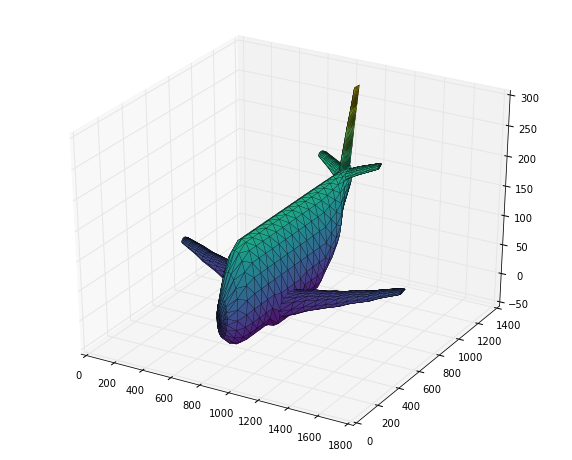

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=faces, cmap=plt.cm.viridis,  linewidth=0.2)

In [21]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()